### 1. LINEAR REGRESSION - MEDICAL INSURANCE PREDICTION

##### IMPORTING THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### READING THE DATASET

In [2]:
df = pd.read_csv("Insurance Data.csv")

#### EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.shape

(1338, 7)

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

#### DATA VISUALIZATION

##### COUNT PLOT

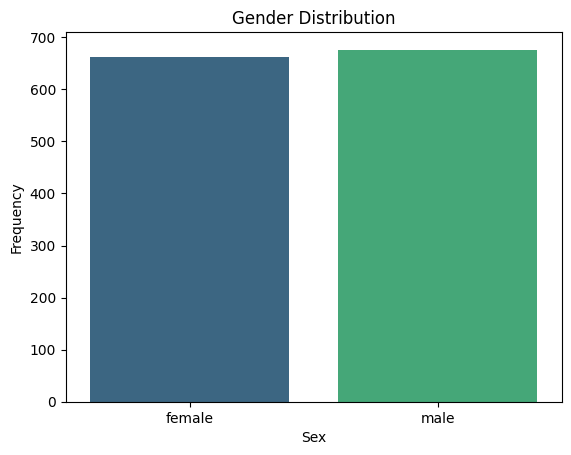

In [11]:
sns.countplot(x="sex", data=df, hue="sex", palette="viridis")
plt.title("Gender Distribution")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.show()

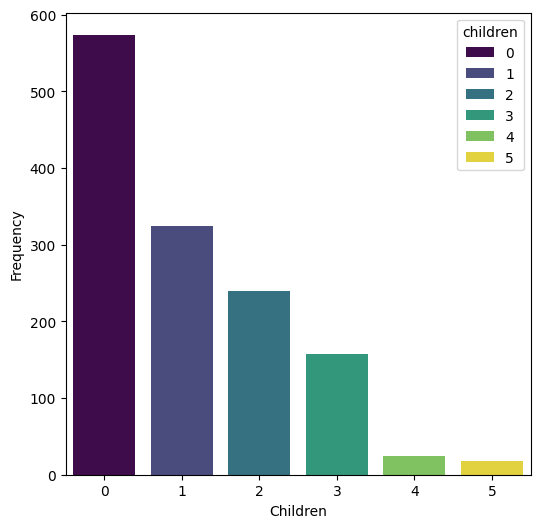

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x="children", data=df, hue="children", palette="viridis")
plt.xlabel("Children")
plt.ylabel("Frequency")
plt.show()

##### HISTPLOT

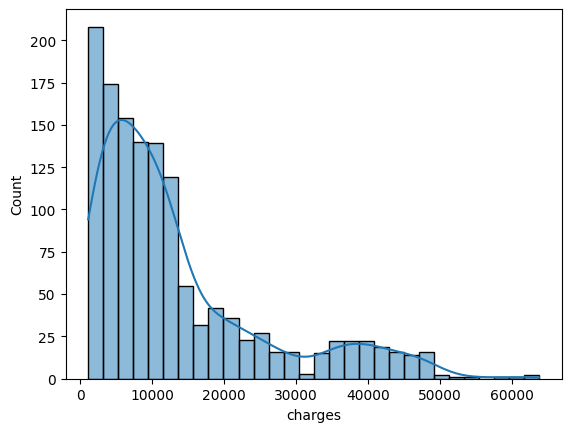

In [13]:
sns.histplot(df["charges"], kde=True)
plt.show()

##### PAIR PLOT

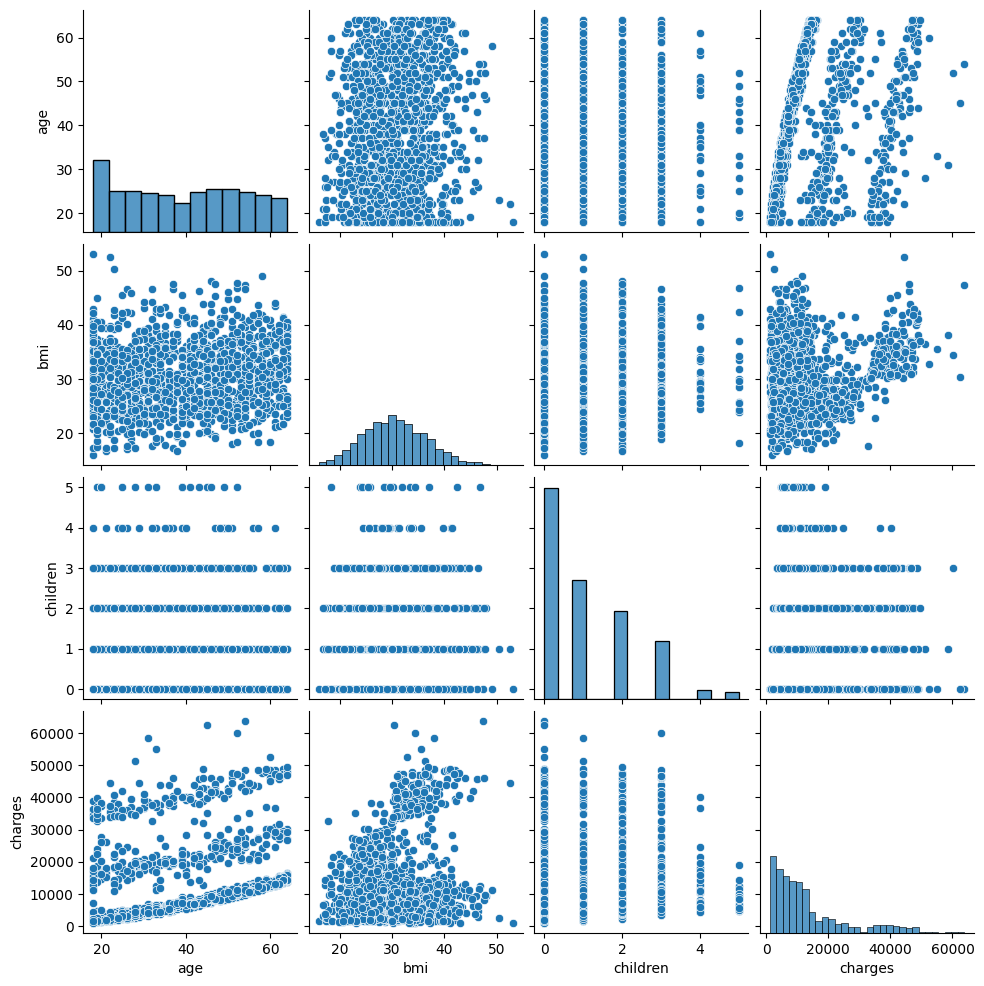

In [14]:
sns.pairplot(df)
plt.show()

#### DATA ENCODING

In [15]:
df.replace({'sex':{'male':0, 'female':1}}, inplace = True)
df.replace({'smoker':{'yes':0, 'no':1}}, inplace = True)
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace = True)

C:\Users\Surya Prakash\AppData\Local\Temp\ipykernel_24484\2466470437.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0, 'female':1}}, inplace = True)
C:\Users\Surya Prakash\AppData\Local\Temp\ipykernel_24484\2466470437.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0, 'no':1}}, inplace = True)
C:\Users\Surya Prakash\AppData\Local\Temp\ipykernel_24484\2466470437.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version.

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


##### CORRELATION HEATMAP

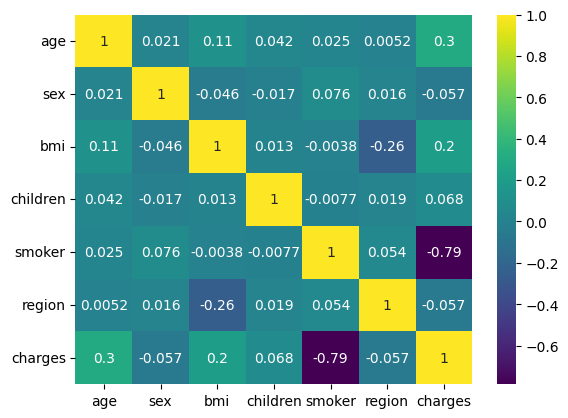

In [17]:
corr_matrix = df.corr() 
sns.heatmap(corr_matrix, annot=True, cmap="viridis")
plt.show()

#### DEPENDENT AND INDEPENDENT FEATURES

In [18]:
x = df.drop(columns='charges',axis=1)
y = df["charges"]

In [19]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [20]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

#### TRAIN TEST SPLIT

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=32)

#### BUILDING THE MODEL

In [22]:
model = LinearRegression()

In [23]:
model.fit(x_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(x_test)

#### SLOPE AND INTERCEPT OF THE MODEL

In [25]:
slope = model.coef_
intercept = model.intercept_

In [26]:
print("Slope of the model:\n",slope)
print("Intercept of the model: ",intercept)

Slope of the model:
 [ 2.55484404e+02  2.14335623e+01  3.40552708e+02  4.88925260e+02
 -2.37163480e+04  3.06684873e+02]
Intercept of the model:  10725.581810201837


#### PERFORMANCE METRICES

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
print("Mean Absolute Error(MAE): {:.3f}".format(mae))
print("Mean Squared Error(MSE): {:.3f}".format(mse))
print("R Squared Error(R2): {:.5f}".format(r2))

Mean Absolute Error(MAE): 3805.829
Mean Squared Error(MSE): 29277299.054
R Squared Error(R2): 0.78374


#### BEST FIT LINE

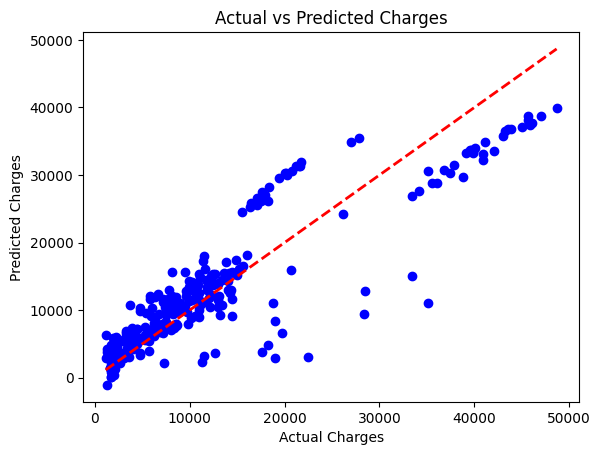

In [29]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--", lw=2, color="red")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()

#### PREDICTIONS

In [30]:
data = pd.DataFrame({
    'age': [41],
    'sex': [0],
    'bmi': [21.78],
    'children': [1],
    'smoker': [1],
    'region': [0]
})

In [31]:
prediction = model.predict(data)

In [32]:
prediction

array([5390.25759077])